# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [25]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Step 2: Read in your data set 

In [35]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.info()
print df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
None
   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [6]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

##### Answer: ~400 some missing values for some observations

#### Question 2. Create a summary table

In [8]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [15]:
df_raw.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [58]:
df['gre_normalized'] = df['gre']/800
df['gpa_normalized'] = df['gpa']/4

print df.head()

   admit    gre   gpa  prestige  gre_normalized  gpa_normalized
0      0  380.0  3.61       3.0           0.475          0.9025
1      1  660.0  3.67       3.0           0.825          0.9175
2      1  800.0  4.00       1.0           1.000          1.0000
3      1  640.0  3.19       4.0           0.800          0.7975
4      0  520.0  2.93       4.0           0.650          0.7325


C:\Users\arean\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\arean\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE scores have a larger range of numbers (0-800) compared to GPA scores which range from 0-4.

#### Question 4. Drop data points with missing data


In [59]:
df = df_raw.dropna(how='any')

In [60]:
df.isnull().sum()

admit             0
gre               0
gpa               0
prestige          0
gre_normalized    0
gpa_normalized    0
dtype: int64

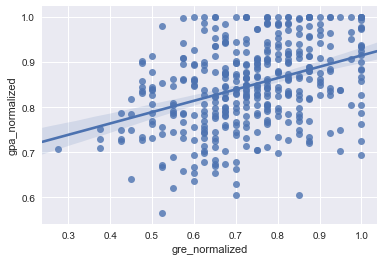

In [61]:
sns.regplot(df['gre_normalized'], df['gpa_normalized'])

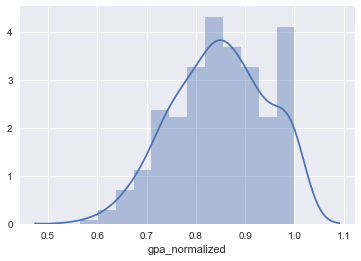

In [63]:
gpa_dist = sns.distplot(df['gpa_normalized'], )

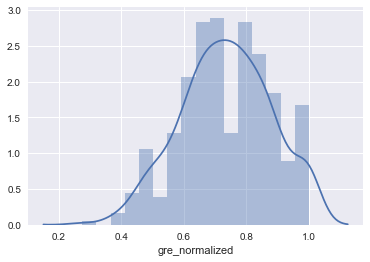

In [64]:
gre_dist = sns.distplot(df['gre_normalized'])

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Using df.isnull().sum() before and after to view total NAN values. When isnull().sum() = 0, no NaN values exist.

#### Question 6. Create box plots for GRE and GPA

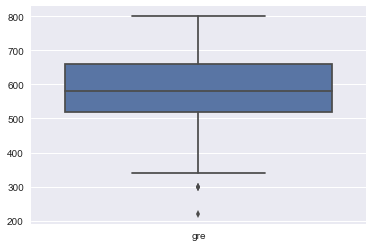

In [27]:
#boxplot 1
boxplot1 = sns.boxplot(df[['gre']])

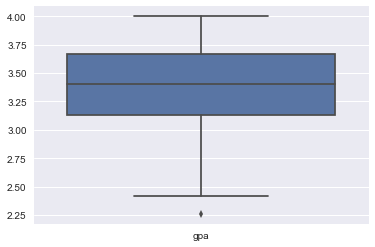

In [28]:
#boxplot 2 
boxplot2 = sns.boxplot(df[['gpa']])

#### Question 7. What do this plots show?

Answer: Median, 25th and 75th quartiles, range of data (max, min) and outliers. 

#### Question 8. Describe each distribution 

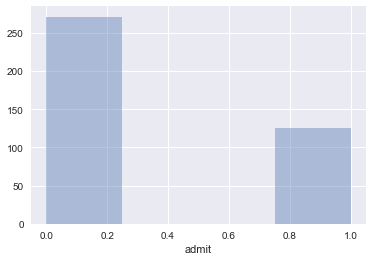

In [68]:
# plot the distribution of each variable 
admit_dist = sns.distplot(df['admit'], kde = False)

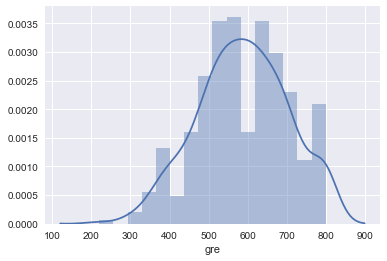

In [32]:
gre_dist = sns.distplot(df['gre'])

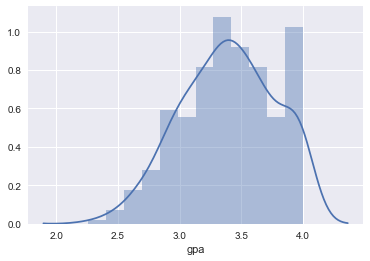

In [33]:
gpa_dist = sns.distplot(df['gpa'])

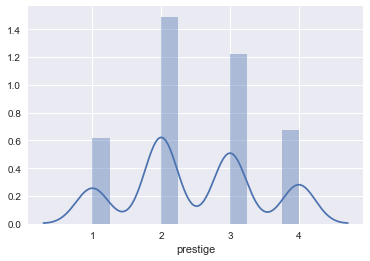

In [36]:
prestige_dist = sns.distplot(df['prestige'])

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. Most of our data is skewed and kirtosis is not normal. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes. The probability density function can change if sample size grows. To correct this we would need to conduct a bootstrap sample so that we can get a greater estimate of the probabilities. 

#### Question 11. Which of our variables are potentially colinear? 

In [45]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


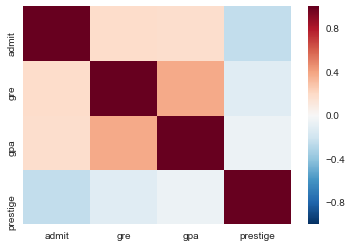

In [46]:
sns.heatmap(df.corr())

#### Question 12. What did you find?

Answer: 
1. There is a positive correlation between GRE and GPA and admissions and GPA.
2. There is a negative correlations between prestige and admissions, gre, and gpa.

Non were above 60%, meaning their correlations are not as significant and further analysis is needed to determine if indeed there is an association between variables. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Visualize data
2. Summarize statistics
3. Find correlation
4. Find p-value to ensure association was not by chance
5. Come up with questions or ideas to explore

    a. i.e. Why is the correlation negative?
    

6. Explore options to prove or disprove questions/ideas

    a. Select appropriate models to test questions/ideas
    

#### Question 14. What is your hypothesis? 

Answer: There is no association between grad school admissions and prestige of undergraduate schools. 

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

In [71]:
df['gpa_log'] = np.log(df['gpa'])
df['gre_log'] = np.log(df['gre'])
print df.head()

   admit    gre   gpa  prestige  gre_normalized  gpa_normalized   gpa_log  \
0      0  380.0  3.61       3.0           0.475          0.9025  1.283708   
1      1  660.0  3.67       3.0           0.825          0.9175  1.300192   
2      1  800.0  4.00       1.0           1.000          1.0000  1.386294   
3      1  640.0  3.19       4.0           0.800          0.7975  1.160021   
4      0  520.0  2.93       4.0           0.650          0.7325  1.075002   

    gre_log  
0  5.940171  
1  6.492240  
2  6.684612  
3  6.461468  
4  6.253829  


C:\Users\arean\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\arean\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


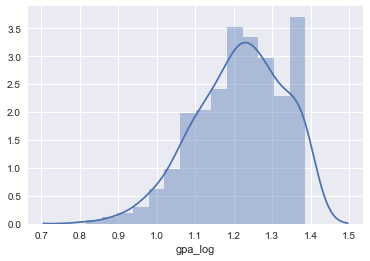

In [72]:
sns.distplot(df['gpa_log'])

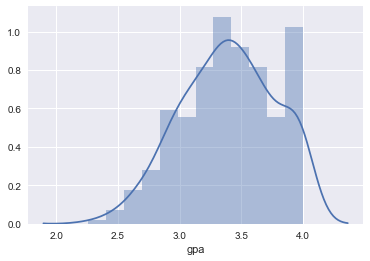

In [74]:
sns.distplot(df['gpa'])

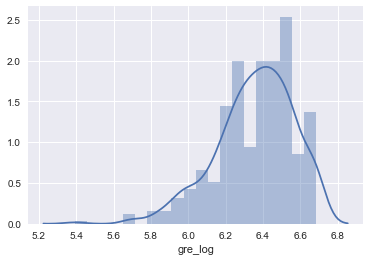

In [73]:
sns.distplot(df['gre_log'])

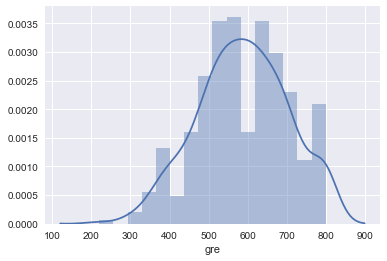

In [75]:
sns.distplot(df['gre'])

#### 3. Advanced: Impute missing data

In [79]:
df_raw = df_raw.fillna(df_raw.mean)

In [80]:
df_raw.count()

admit             400
gre               400
gpa               400
prestige          400
gre_normalized    400
gpa_normalized    400
dtype: int64